<a href="https://colab.research.google.com/github/deelilah/Moringa-IP4/blob/master/Data_Cleaning_IP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Data cleaning for Analysis of the Autolib Dataset
#start by importing and uploading our data set

Upload the libraries


In [0]:
#importing the needed libraries
import pandas as pd
import numpy as np

Data Upload

In [2]:
#loading to read the csv files
load_df=pd.read_csv("Autolib_dataset.csv")
load_df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [0]:
#view the first and last items in the datast

In [3]:
load_df.shape

(5000, 25)

In [4]:
load_df.tail()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [0]:
#Validity
#Drop unecessary columns
#selected the display comment and the scheduled at which have no value

drop_col=load_df.drop(['Displayed comment','Scheduled at'],axis=1,inplace=True)
drop_col

In [6]:
load_df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [7]:
#space removal
load_df.columns.str.strip()

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

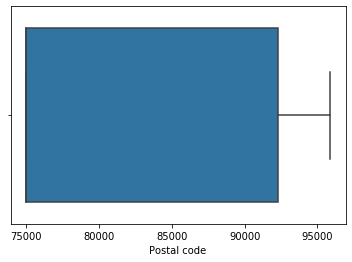

In [8]:
#outliers
#using the box plot method
import seaborn as sns
sns.boxplot(x = load_df['Postal code'])

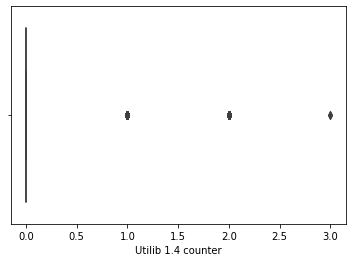

In [0]:
sns.boxplot(x = load_df['Utilib 1.4 counter'])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0,

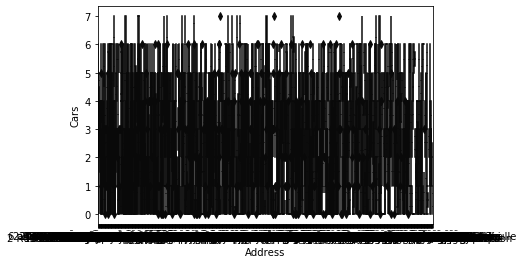

In [10]:
#seems like our data contains a lot of outliers lets start removing them using the zscore method
bplot = sns.boxplot(y='Cars', x='Address', data=load_df, width=0.5, palette="pink")

In [11]:
#this is just to name the graph


bplot.axes.set_title("The Autolib plot", fontsize=14)
bplot.set_xlabel("Address", fontsize=12)
bplot.set_ylabel("Cars", fontsize=12)

Text(80.61739130434782, 0.5, 'Cars')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0,

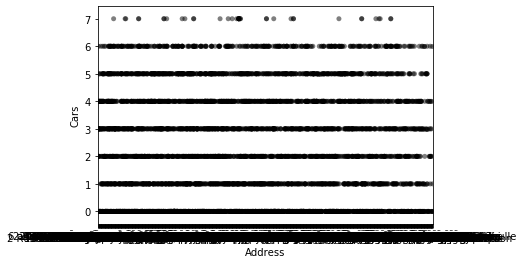

In [15]:
bplot=sns.stripplot(y='Cars', x='Address',  data=load_df, jitter=True, marker='o', alpha=0.5, color='black')

In [0]:
#before removing an outlier ,we will mute the columns with str so as to enable valid check for outliers

# load_df1=load_df.drop(["Charging Status","City","ID","Kind","Geo point","Public name","Rental status","Station type","Status","Subscription status","Address"], axis = 1) 
# load_df1


In [0]:
# # # #method two to check outliers zscore
# from scipy import stats
# z_outlier= np.abs(stats.zscore(load_df1))
# z_outlier

In [0]:
# threshold = 3
# print(np.where(z_outlier > 3))

In [0]:

# The first array below contains the list of row numbers and second array respective column numbers, 
# z_outlier[2][3] 

In [0]:

# # we want to use a copy of loaf_df1
# load_zs = load_df1

# # # removing the outliers
# load_zs = load_zs[(z_outlier < 3).all(axis=1)]
# load_zs


In [0]:
# examining the shape of our old dataset
# print(load_df1.shape)

In [0]:
# examining the shape of our old dataset
# load_zs.head()

In [12]:
# #method3
Q1 = load_df.quantile(0.25)
Q3 = load_df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Cars                      4.0
Bluecar counter           4.0
Utilib counter            0.0
Utilib 1.4 counter        0.0
Charge Slots              0.0
Postal code           17308.0
Slots                     3.0
year                      0.0
month                     0.0
day                       4.0
hour                     12.0
minute                   30.0
dtype: float64


In [13]:
print((load_df < (Q1 - 1.5 * IQR)) |(load_df > (Q3 + 1.5 * IQR)))

      Address  Bluecar counter   Cars  ...  minute  month   year
0       False            False  False  ...   False  False  False
1       False            False  False  ...   False  False  False
2       False            False  False  ...   False  False  False
3       False            False  False  ...   False  False  False
4       False            False  False  ...   False  False  False
...       ...              ...    ...  ...     ...    ...    ...
4995    False            False  False  ...   False  False  False
4996    False            False  False  ...   False  False  False
4997    False            False  False  ...   False  False  False
4998    False            False  False  ...   False  False  False
4999    False            False  False  ...   False  False  False

[5000 rows x 23 columns]


In [14]:


load_df2= load_df[~((load_df< (Q1 - 1.5 * IQR)) |(load_df > (Q3 + 1.5 * IQR))).any(axis=1)]
load_df2.shape


(3317, 23)

In [0]:
#check for the accuracy 
# load_df1.to_datetime(load_df1['hours'] + ' ' + load_df['minute'])


In [15]:
#completeness
#removing all the missing values
load_df2.isnull().sum()

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [16]:
load_df2.head(20)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2
11,12 Rue Francis de PressensÃ©,1,1,0,0,0,nonexistent,Puteaux,puteaux-francisdepressense-12,STATION,"48.8761876, 2.2361346",92800,Puteaux/Francis de PressensÃ©/12,operational,4,station,ok,nonexistent,2018,4,6,9,20
13,34 avenue Jean Moulin,0,0,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,0,station,ok,nonexistent,2018,4,8,21,54
15,3 rue Jean JaurÃ¨s,0,0,0,0,0,nonexistent,Fontenay-aux-Roses,fontenayauxroses-jeanjaures-3,SPACE,"48.7906824, 2.28727",92260,Fontenay-aux-Roses/Jean JaurÃ¨s/3,operational,4,full_station,ok,operational,2018,4,2,0,21


In [17]:
#This will remove the duplicates
df_dup = load_df2.drop_duplicates()

# Let's see these non-duplicate files
print(df_dup)
#lets check for duplicated columns
df_dup.duplicated()

                                 Address  Cars  ...  hour  minute
0                    2 Avenue de Suffren     0  ...    11      43
1              145 Rue Raymond Losserand     6  ...     7      24
4     6 avenue de la Porte de Champerret     3  ...    17      23
5                   8 Boulevard Voltaire     0  ...     7       2
6                         37 rue Leblanc     0  ...    18      20
...                                  ...   ...  ...   ...     ...
4993          6 avenue Charles-de-Gaulle     6  ...     4      43
4994                    15 rue de Rocroy     0  ...    20      49
4995                 8 avenue MÃ©nelotte     2  ...    11      26
4998         2 avenue du Val de Fontenay     2  ...    17      27
4999                 5 Rue Henry Brisson     4  ...    10       2

[3317 rows x 23 columns]


0       False
1       False
4       False
5       False
6       False
        ...  
4993    False
4994    False
4995    False
4998    False
4999    False
Length: 3317, dtype: bool

In [18]:
#uniformity change columns to suite the lower or uppercase rule
df_dup.columns = df_dup.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df_dup.iloc[:5]

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20


Analysis


In [0]:
#export data set
df_dup=df_dup.to_csv("Autolib_cleaned.csv")
df_dup

In [20]:
df1=pd.read_csv("Autolib_cleaned.csv")
df1

,Unnamed: 0,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
3,5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,4,station,ok,nonexistent,2018,4,6,7,2
4,6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,8,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,4993,6 avenue Charles-de-Gaulle,6,6,0,0,0,nonexistent,Le Plessis-Robinson,leplessisrobinson-charlesdegaulle-6,STATION,"48.781849, 2.263931",92350,Le Plessis-Robinson/Charles-de-Gaulle/6,operational,0,station,ok,nonexistent,2018,4,2,4,43
3313,4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,1,station,ok,nonexistent,2018,4,1,20,49
3314,4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
3315,4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [22]:
df2=df1[(df1['city']=='Paris') & (df1['bluecar_counter']!=0)]
df2.head()

,Unnamed: 0,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
1,1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
5,8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018,4,2,22,58
6,9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2
11,17,182 Boulevard Voltaire,6,6,0,0,0,operational,Paris,paris-voltaire-182,STATION,"48.8548, 2.385047",75011,Paris/Voltaire/182,operational,0,station,ok,nonexistent,2018,4,9,12,14


In [23]:
#merging the year,month,day,,hour, minute columns into one
df2['Timemerge'] = pd.to_datetime(df2[['day','month','year','hour','minute']])
df2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,public_name,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,Timemerge
1,1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00
5,8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018,4,2,22,58,2018-04-02 22:58:00
6,9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2,2018-04-04 15:02:00
11,17,182 Boulevard Voltaire,6,6,0,0,0,operational,Paris,paris-voltaire-182,STATION,"48.8548, 2.385047",75011,Paris/Voltaire/182,operational,0,station,ok,nonexistent,2018,4,9,12,14,2018-04-09 12:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,4972,6 avenue des Ternes,2,2,0,0,0,operational,Paris,paris-ternes-6,STATION,"48.8782587, 2.2967633",75017,Paris/Ternes/6,operational,3,station,ok,nonexistent,2018,4,2,7,54,2018-04-02 07:54:00
3298,4973,18 Rue Balard,5,5,0,0,0,operational,Paris,paris-balard-18,SPACE,"48.8445403, 2.2771564",75015,Paris/Balard/18,operational,0,full_station,ok,operational,2018,4,9,13,34,2018-04-09 13:34:00
3304,4982,62 Avenue Parmentier,4,4,0,0,0,nonexistent,Paris,paris-parmentier-62,STATION,"48.862875, 2.3765261",75011,Paris/Parmentier/62,operational,0,station,ok,nonexistent,2018,4,5,23,30,2018-04-05 23:30:00
3305,4983,4 avenue de la SÅur Rosalie,1,1,0,0,0,nonexistent,Paris,paris-soeurrosalie-4,STATION,"48.83185, 2.354094",75013,Paris/SÅur Rosalie/4,operational,2,station,ok,nonexistent,2018,4,6,9,14,2018-04-06 09:14:00


In [30]:
df3=df2.drop(['Timestamp'],axis=1)
df3

KeyError: ignored

In [24]:
#group the timemerge and id
df3= df2.sort_values(['Timemerge']).groupby(['id','Timemerge','hour']).sum()
df3



Unnamed: 0  cars  ...  day  minute
id                 Timemerge           hour                    ...             
paris-25aout1944-8 2018-04-01 18:40:00 18           710     1  ...    1      40
                   2018-04-02 07:37:00 7           1891     4  ...    2      37
                   2018-04-02 12:49:00 12          2312     2  ...    2      49
                   2018-04-04 03:10:00 3            911     3  ...    4      10
                   2018-04-04 18:48:00 18          4940     1  ...    4      48
...                                                 ...   ...  ...  ...     ...
paris-voltaire-8   2018-04-03 00:18:00 0           1836     4  ...    3      18
                   2018-04-04 21:22:00 21          3060     3  ...    4      22
paris-vouille-47   2018-04-01 05:03:00 5           1790     4  ...    1       3
                   2018-04-07 12:57:00 12           526     2  ...    7      57
paris-wagram-77    2018-04-06 00:07:00 0            546     2  ...    6       7

[1016 rows x 12 columns]

In [25]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) 
# in the city of Paris over the month of April 2018
df4= df3.groupby(['id'])['bluecar_counter'].apply(lambda x:  x.shift(1) - x)
df4
df3.iloc[:5]


Unnamed: 0  cars  ...  day  minute
id                 Timemerge           hour                    ...             
paris-25aout1944-8 2018-04-01 18:40:00 18           710     1  ...    1      40
                   2018-04-02 07:37:00 7           1891     4  ...    2      37
                   2018-04-02 12:49:00 12          2312     2  ...    2      49
                   2018-04-04 03:10:00 3            911     3  ...    4      10
                   2018-04-04 18:48:00 18          4940     1  ...    4      48

[5 rows x 12 columns]

In [33]:
# What is the most popular hour for returning cars?
df5 =df4[(df4 < 0)].groupby(['hour']).sum().sort_values(ascending = True)
df5.iloc[:1]

hour
2   -29.0
Name: bluecar_counter, dtype: float64

In [35]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
df4=df3[(df3 > 0)].groupby(['hour']).sum().sort_values(ascending = False)
df5.iloc[:1]

TypeError: ignored

In [34]:
#most popular station
df4= df4.abs()
df3.groupby(['id']).sum().sort_values(ascending = False).iloc[:1]

TypeError: ignored